1. Træne en model til at kunne gennemskue, om et review er positivt eller negativt baseret på tekstindholdet (classification & natural language processing)
2. Gruppere mest populære ord i positive og negative reviews, og visualisere det
3. Sammenligne den trænede model mod det rigtige datasæt, for at se hvor nøjagtig den er ift. Datasættet
4. Se om der er en sammenhæng mellem længde af review og rating
5. Fordi datasættets format er simpel, kan vi webscrape reviews fra andre sider, og bruge vores trænede model på dem for at se, om den kan genneskue
Om reviewet er positivt eller negativt.


In [2]:
pip install fasttext

  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-win_amd64.whl size=236763 sha256=9d45b5b5809231dd2ecdeacfea2fb596dc2b75d317d51647dfa23035662efc29
  Stored in directory: c:\users\oliver\appdata\local\pip\cache\wheels\93\61\2a\c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=51d37d95da150a9c953254642f43975051bb4bd7f17ba41a3b79447873aac17d
  Stored in directory: c:\users\oliver\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# IMPORTANT
### create a directory named "model" in the root of this directory before running the steps below

In [2]:
import setup
import fasttext

#setup.run_step_one()
#setup.run_step_two()
#setup.run_step_three()



In [8]:
model = fasttext.load_model("model/trained_review_model.bin");
model.predict("Received this game under the assumption that it was by Hasbro (like their picture shows). The package not only arrived damaged but it is a fake. The Hasbro logo is not on the box. The quality of the game is disappointing. The mat is small and cheap plastic, like a 99 cent plastic table cloth. Definitely not worth the price, delivery time or hassle.")

(('__label__1',), array([0.99974936]))

In [4]:
model.test("dataset/train.ft.txt")

(3600000, 0.9268491666666666, 0.9268491666666666)

In [48]:
import shlex
import csv

filename = 'dataset/train.csv'

#Clean and save to new array
newArray = []
#count = 1
with open(filename, encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        row.pop(1)
        row[1] = row[1].replace(',', '').replace('"', '').replace("'", '').replace("!", '').lower()
        newArray.append("__label__" + " ".join(row))
        #count += 1;
        #if count == 20:
            #break;
        
with open("dataset/train_formattet.txt", "w", encoding="utf-8") as txt_file:
    for line in newArray:
        txt_file.write(line + "\n")

['"3"', '"more like funchuck"', '"Gave this to my dad for a gag gift after directing ""Nunsense', '"" he got a reall kick out of it!"']


In [49]:
filename = 'dataset/test.csv'

#Clean and save to new array
newArray = []
#count = 1
with open(filename, encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        row.pop(1)
        row[1] = row[1].replace(',', '').replace('"', '').replace("'", '').replace("!", '').lower()
        newArray.append("__label__" + " ".join(row))
        #count += 1;
        #if count == 20:
            #break;
        
    
with open("dataset/test_formattet.txt", "w", encoding="utf-8") as txt_file:
    for line in newArray:
        txt_file.write(line + "\n")

In [12]:
model = fasttext.train_supervised("dataset/train_formattet.txt", lr=0.2, epoch=10)
print("done training")

done training


In [3]:
model.save_model("model/trained_review_stars_model.bin")

NameError: name 'model' is not defined

In [11]:
model.test("dataset/train_formattet.txt")

(3000000, 0.5560816666666667, 0.5560816666666667)

In [10]:
model.predict("""I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It's a ""backup"" charger for when I manage to drain all my AAs but I wouldn't want this as my only charger.""", k=5)

(('__label__1', '__label__2', '__label__3', '__label__4', '__label__5'),
 array([0.60981095, 0.28377995, 0.08508671, 0.01462938, 0.00674308]))

In [1]:
import pop_words

one_star, two_stars, three_stars, four_stars, five_stars = pop_words.prepare_category_dfs("dataset/train.csv")


100%|██████████| 5/5 [00:00<00:00, 16.77it/s]


In [10]:
# choose which reviews to clean up 
cleaned_reviews = pop_words.clean_reviews(five_stars)



100%|██████████| 600000/600000 [04:29<00:00, 2229.63it/s]


Generating wordcloud...
Saving wordcloud image in images folder.
5_stars wordcloud


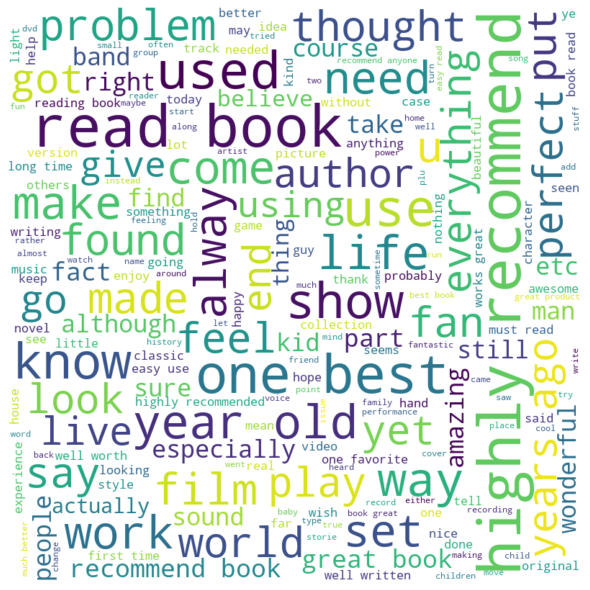

In [11]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# name will be used to save wordcloud image
name = "5_stars"
all_words = ""

for review in cleaned_reviews:
    all_words += " ".join(review) + " "

print("Generating wordcloud...")
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_words)

print("Saving wordcloud image in images folder.")
wordcloud.to_file("images/" + name + "_wordcloud.png")

print(name + " wordcloud")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


1_star_wordcloud.png



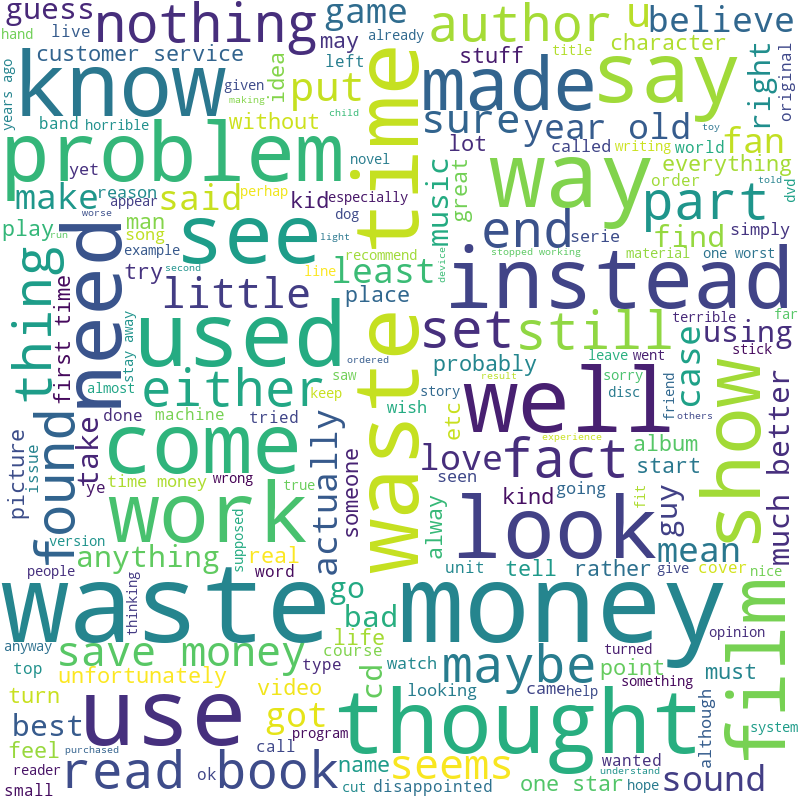





2_stars_wordcloud.png



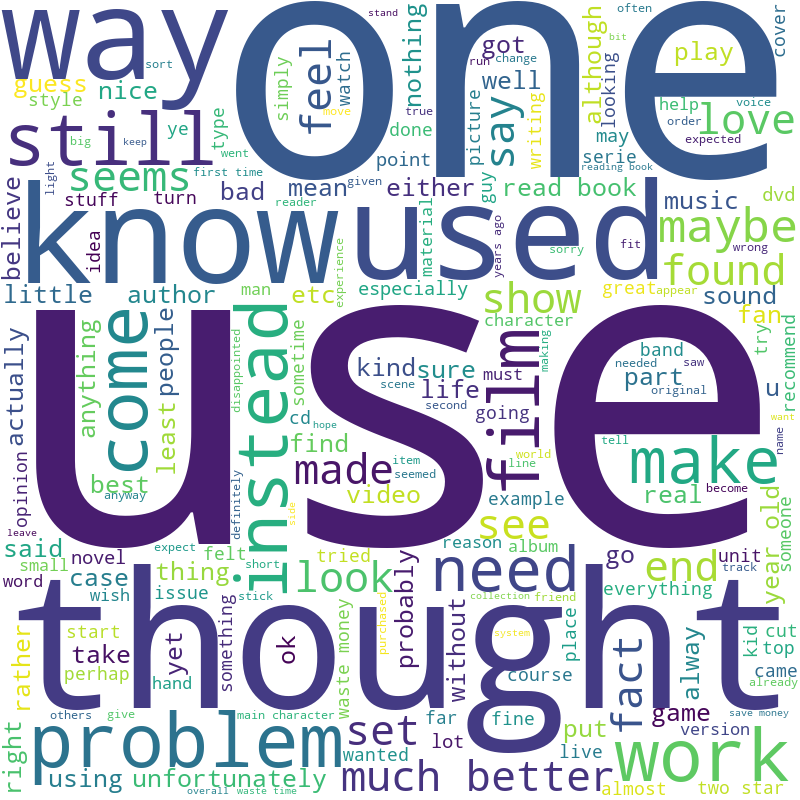





3_stars_wordcloud.png



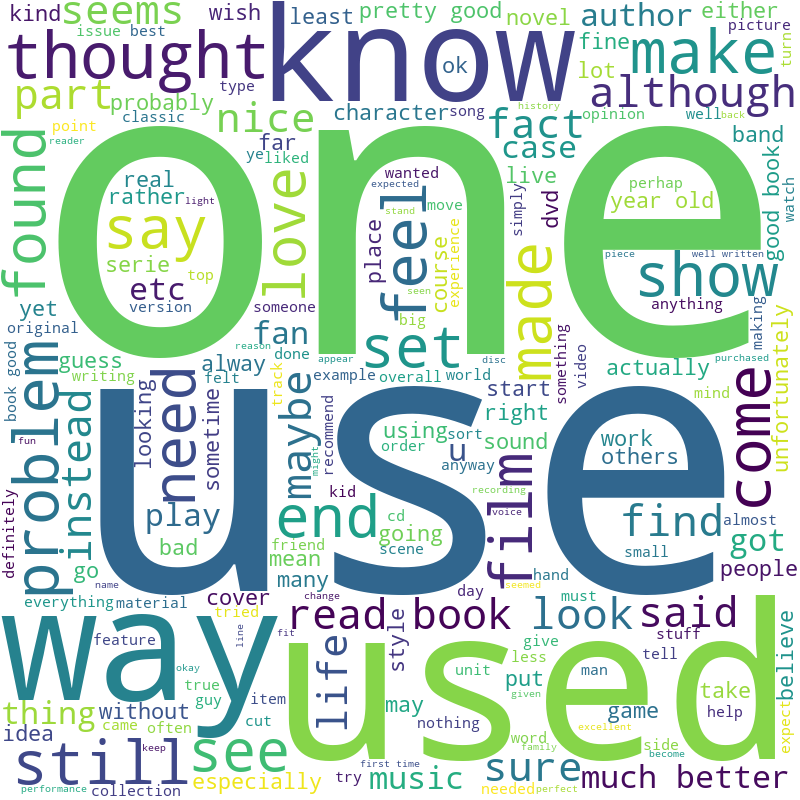





4_stars_wordcloud.png



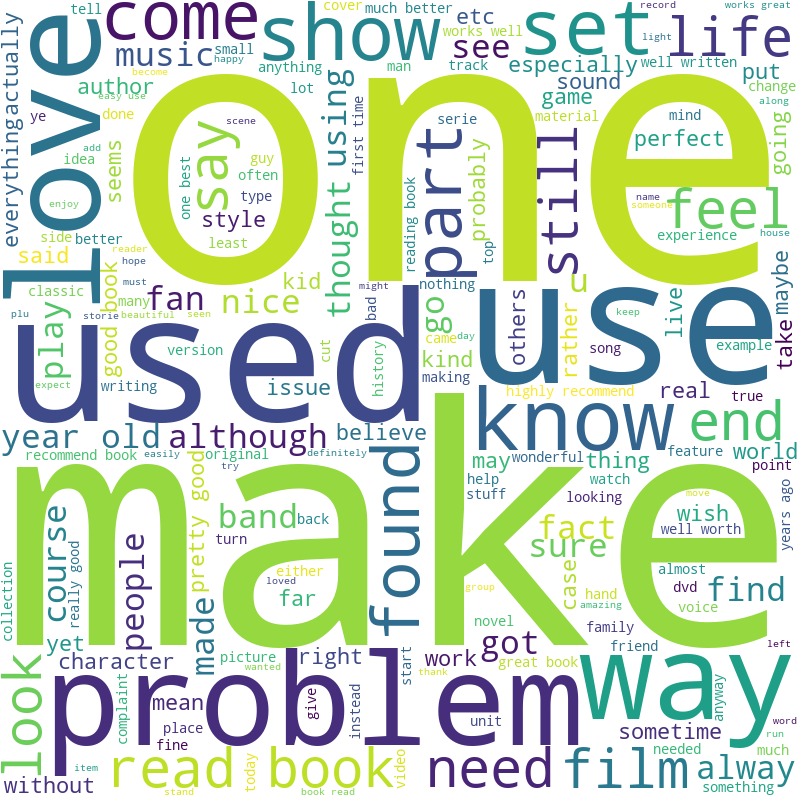





5_stars_wordcloud.png



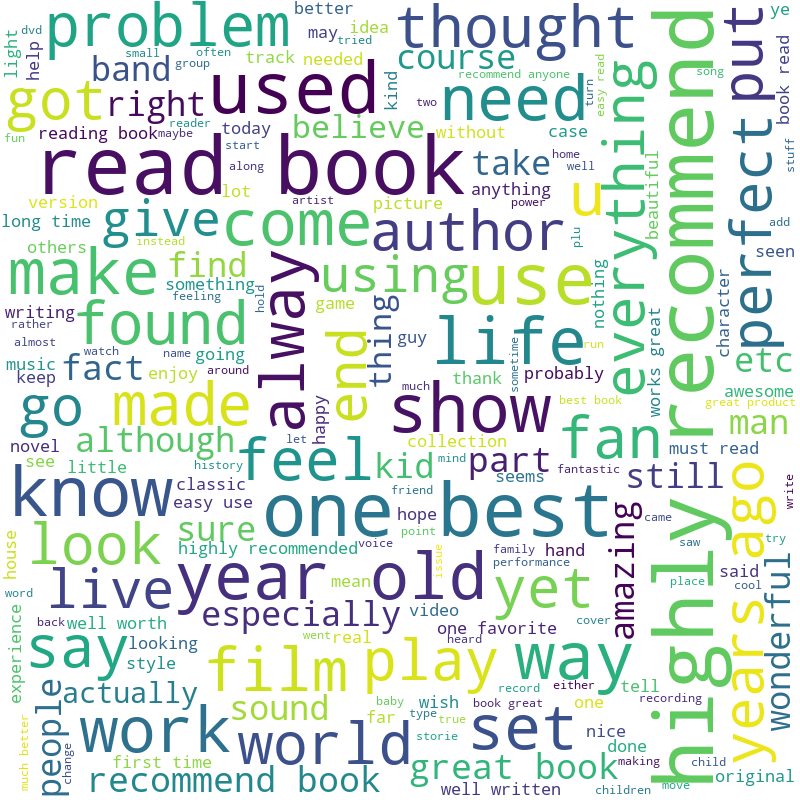

In [12]:
from IPython.display import Image, display 

img_names = ["1_star_wordcloud.png", "2_stars_wordcloud.png", "3_stars_wordcloud.png", "4_stars_wordcloud.png", "5_stars_wordcloud.png"]
for img in img_names:
    print("\n" + img + "\n")
    display(Image(filename="images/" + img))
    print("\n\n")